In [78]:
# 爬取新闻网站
from bs4 import BeautifulSoup
import requests

headers = {
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "zh-CN,zh;q=0.8",
    "Connection": "close",
    "Cookie": "_gauges_unique_hour=1; _gauges_unique_day=1; _gauges_unique_month=1; _gauges_unique_year=1; _gauges_unique=1",
    "Referer": "http://www.infoq.com",
    "Upgrade-Insecure-Requests": "1",
    "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.98 Safari/537.36 LBBROWSER"
}
url = 'http://www.infoq.com/cn/news'

# 取得新闻标题
def craw2(url):
    response = requests.get(url, headers=headers)
    # soup = BeautifulSoup(response.text, 'lxml')
    soup = BeautifulSoup(response.text, "html.parser")
    for title_href in soup.find_all('div', class_='news_type_block'):
        print([title.get('title')
              for title in title_href.find_all('a') if title.get('title')])

# craw2(url)

# 翻页
for i in range(15, 46, 15):
    url = 'http://www.infoq.com/cn/news/' + str(i)
    # print(url)
    craw2(url)

In [76]:
# BeautifulSoup
# pip3 install bs4
# pip3 install lxml
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup

# soup = BeautifulSoup(html_doc, 'lxml') # lxml是使用xml语法解析网页

# print(soup.prettify())

#
# # 找到title标签
# print(soup.title)
#
# # title 标签里的内容
# print(soup.title.string)


# # 找到p标签
# print(soup.p)
#
# # 找到p标签class的名字
# print(soup.p['class'])
#
# # 找到第一个a标签
# print(soup.a)
#
# # 找到所有的a标签
# print(soup.find_all('a'))
#
#
# # 找到id为link3的的标签
# print(soup.find(id="link3"))
#
# # 找到所有<a>标签的链接
# for link in soup.find_all('a'):
#     print(link.get('href'))
#
# # 找到文档中所有的文本内容
# print(soup.get_text())

In [70]:
# 结合正则爬取图片链接
import requests
import re
content = requests.get('http://www.cnu.cc/discoveryPage/hot-人像').text
# print(content)
# 内容大致如下：
# < div class ="grid-item work-thumbnail" >
# < a href="(.*?)".*?title">(.*?)</div>
# < div class ="author" > LynnWei < / div >

pattern = re.compile(r'<a href="(.*?)".*?title">(.*?)</div>', re.S) # re.S 表示 “.”（不包含外侧双引号）的作用扩展到整个字符串
results = re.findall(pattern, content)
print(results)

for result in results:
    url, name = result
    print(url, re.sub('\s', '', name))

[]


In [66]:
# requests 库 pip3 install requests
# get请求
import requests
url = 'http://httpbin.org/get'
data = {'key': 'value', 'abc': 'xyz'}
# .get是使用get方式请求url，字典类型的data不用进行额外处理
response = requests.get(url, data)
print(response.text)


# post请求
import requests
url = 'http://httpbin.org/post'
data = {'key': 'value', 'abc': 'xyz'}
# .post表示为post方法
response = requests.post(url, data)
# 返回类型为json格式
print(response.json())

{
  "args": {
    "abc": "xyz", 
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.28.1", 
    "X-Amzn-Trace-Id": "Root=1-63a808f5-550398c7493439ec6a85fbb1"
  }, 
  "origin": "117.132.194.121", 
  "url": "http://httpbin.org/get?key=value&abc=xyz"
}

{'args': {}, 'data': '', 'files': {}, 'form': {'abc': 'xyz', 'key': 'value'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Content-Length': '17', 'Content-Type': 'application/x-www-form-urlencoded', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.28.1', 'X-Amzn-Trace-Id': 'Root=1-63a808f6-2d53b9315de649dd247c3b2b'}, 'json': None, 'origin': '117.132.194.121', 'url': 'http://httpbin.org/post'}


In [65]:
# http 头部信息模拟
from urllib import request
from urllib import parse

headers = {
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "zh-CN,zh;q=0.8",
    "Connection": "close",
    "Cookie": "_gauges_unique_hour=1; _gauges_unique_day=1; _gauges_unique_month=1; _gauges_unique_year=1; _gauges_unique=1",
    "Referer": "http://httpbin.org",
    "Upgrade-Insecure-Requests": "1",
    "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.98 Safari/537.36 LBBROWSER"
}

data = bytes(parse.urlencode({'word':'hello'}), encoding='utf8')
req = request.Request(url="http://httpbin.org/post", data=data, headers=headers, method="POST")
response = request.urlopen(req)
print(response.read().decode("utf-8"))

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "word": "hello"
  }, 
  "headers": {
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8", 
    "Accept-Encoding": "identity", 
    "Accept-Language": "zh-CN,zh;q=0.8", 
    "Content-Length": "10", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Cookie": "_gauges_unique_hour=1; _gauges_unique_day=1; _gauges_unique_month=1; _gauges_unique_year=1; _gauges_unique=1", 
    "Host": "httpbin.org", 
    "Referer": "http://httpbin.org", 
    "Upgrade-Insecure-Requests": "1", 
    "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.98 Safari/537.36 LBBROWSER", 
    "X-Amzn-Trace-Id": "Root=1-63a8082a-2e1a86d46a2f18b44fd9cfbc"
  }, 
  "json": null, 
  "origin": "117.132.194.121", 
  "url": "http://httpbin.org/post"
}



In [60]:
# 爬虫
# 网页数据采集与 urllib 库
# 网络请求库 requests
# 格式处理库 BeautifulSoup 
from urllib import request
from urllib import parse

url = "http://www.baidu.com"
response = request.urlopen(url, timeout=1)
# print(response.read().decode("utf-8"))

# GET 和 POST 请求 
# 用于测试的网站：httpbin.org
response2 =request.urlopen("http://httpbin.org/get", timeout=1)
# print(response2.read())
data = bytes(parse.urlencode({'word':'hello'}), encoding='utf8')
response3 = request.urlopen("http://httpbin.org/post", data=data)
# print(response3.read())

# 关于超时的处理
import socket
try:
     response4 = request.urlopen('http://httpbin.org/get', timeout=0.1)
except urllib.error.URLError as e:
     if isinstance(e.reason, socket.timeout):
         print('TIME OUT')

NameError: name 'urllib' is not defined

In [ ]:
# 机器学习分类的原理
# 类似 ax + by = c 大量数据 x、y 训练
# Tensorflow
# pip3 install tensorflow 或 pip3 install tensorflow-hub -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com
# 模型参考 github.com/tensorflow/models


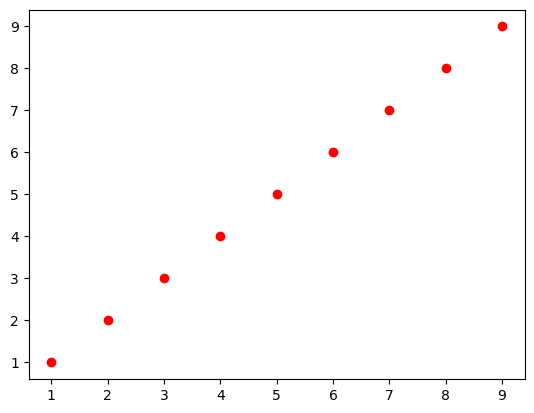

In [51]:
# matplotlib 绘图 pip3 install matplotlib
import matplotlib.pyplot as plt

# 简单曲线
# plt.plot([1, 3, 5], [4, 8, 10])
# plt.show()

import numpy as np

x = np.linspace(-np.pi, np.pi, 100)
# plt.plot(x, np.sin(x))
# plt.show()

# 多条曲线
y = np.linspace(-np.pi * 2, np.pi * 2, 100)
# plt.figure(1, dpi=50) # 创建图表
# for i in range(1, 5): # 画 4 条线
#     plt.plot(x, np.sin(x /i))
# plt.show()

# 绘制直方图
# plt.figure(1, dpi=50)
# data = [1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6, 4]
# plt.hist(data)
# plt.show()

# 绘制散点图
z = np.arange(1, 10)
zz = z
fig = plt.figure()
plt.scatter(z, zz, c='r', marker='o') # c='r'表示散点的颜色为红色，marker表示指定三点多形状为圆形
plt.show()

In [44]:
# pandas
# 数据处理 - pip3 install pandas
from pandas import Series, DataFrame
# import pandas as pd

# 一维数组（自动添加索引）
obj = Series([4, 5, 6, -7])
# print(obj)
# print(obj.index)
# print(obj.values)
# 指定索引
obj2 = Series([4, 5, 6, -7], index=['a', 'b', 'c', 'd'])
# print(obj2)
obj2['a'] = 6
# print(obj2)
# print('a' in obj2)
sdata = {"beijing": 10000, "shenzhen": 2000}
obj3 = Series(sdata)
# print(obj3)
# 修改索引
obj3.index = ["bj", 'sz'];
# print(obj3)

# 多维数组
data = {"city": ["bj", "sz"], "click": [10000, 2000]}
frame = DataFrame(data)
# print(frame)
# 指定排序
frame2 = DataFrame(data, columns=["city"])
# print(frame2)
# print(frame2["city"])
# print(frame2.city)
# 插入新列并赋值
frame2["new"] = 100
# print(frame2)
# 插入列增加条件过滤
frame2["cap"] = frame2.city  == "bj"
# print(frame2)
# 行列互换
# print(frame2.T)

# 重新索引
obj4 = Series([1,2,3], index=["b", "c", "a"])
# print(obj4)
# 不存在的索引会赋予 NaN
obj5 = obj4.reindex(["a", "b", "c", "d"])
# print(obj5)
# 不存在的索引会赋予 NaN，也可以指定填充值
obj6 = obj4.reindex(["a", "b", "c", "d"], fill_value = 0)
# print(obj6)
# 也可以填充上一个索引值/下一个索引值
obj7 = Series(["blue", "red", "green"], index=[0, 2, 4])
# print(obj7.reindex(range(6), method="ffill"))
# print(obj7.reindex(range(6), method="bfill"))

from numpy import nan as NA
# 删除缺失值
data2 = Series([1, NA, 2])
# print(data2.dropna())
# 存在 NA 的都会被删除
data3 = DataFrame([[1., 6.5, 3], [1., NA, NA], [NA, NA, NA]])
# print(data3.dropna())
# 删除全为 NA 的
# print(data3.dropna(how="all"))
# 删除整列都是 NA 的
data3[4] = NA
# print(data3)
# print(data3.dropna(axis=1, how="all"))
# 填充 NA 值
# print(data3.fillna(0))
# 直接操作 data3 的 NA 值填充
# print(data3)
data3.fillna(0, inplace=True)
# print(data3)

# 层次化索引
import numpy as np
data4 = Series(np.random.randn(10), index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
print(data4)
print(data4['b'])
print(data4['b': 'c'])
# 转化成二维的数据
print(data4.unstack())
# 转化回来
print(data4.unstack().stack())

a  1    0.713235
   2   -0.250892
   3    0.133863
b  1   -0.390086
   2    0.208574
   3    0.526102
c  1   -0.387610
   2   -0.534982
d  2    0.103949
   3   -0.870746
dtype: float64
1   -0.390086
2    0.208574
3    0.526102
dtype: float64
b  1   -0.390086
   2    0.208574
   3    0.526102
c  1   -0.387610
   2   -0.534982
dtype: float64
          1         2         3
a  0.713235 -0.250892  0.133863
b -0.390086  0.208574  0.526102
c -0.387610 -0.534982       NaN
d       NaN  0.103949 -0.870746
a  1    0.713235
   2   -0.250892
   3    0.133863
b  1   -0.390086
   2    0.208574
   3    0.526102
c  1   -0.387610
   2   -0.534982
d  2    0.103949
   3   -0.870746
dtype: float64


In [16]:
# numpy
# 数据采集 - 数据预处理 pip3 install numpy
import numpy as np

arr1 = np.array([1,2,3])
print(arr1)
print(arr1.dtype)

arr2 = np.array([1.1, 2.2, 3.3])
print(arr2.dtype)
# 逐个累加
print(arr1 + arr2)
# 逐个*10
print(arr2 * 10)

data = [[1,2,3], [4,5,6]]
arr3 = np.array(data)
# 列表转化
print(arr3)
print(arr3.dtype)

# 生成&填充
print(np.zeros(10))
print(np.zeros((3, 5)))
print(np.ones((3, 5)))
print(np.empty((3, 5, 1)))

# 切片
arr4 = np.arange(10)
print(arr4[5:8])
arr4[5:8] = 10
print(arr4)
arr_slice = arr4[5:8].copy()
arr_slice[:] = 15
print(arr_slice)
print(arr4)

[1 2 3]
int64
float64
[2.1 4.2 6.3]
[11. 22. 33.]
[[1 2 3]
 [4 5 6]]
int64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[[1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]]]
[5 6 7]
[ 0  1  2  3  4 10 10 10  8  9]
[15 15 15]
[ 0  1  2  3  4 10 10 10  8  9]


In [9]:
# 命令行文件、文件夹操作
import os
from pathlib import Path

print(os.path.abspath(''))
print(os.path.exists("/Users"))
print(os.path.isdir("/Users"))
print(os.path.join("/tmp/a/", "b/c"))

p = Path(".")
print(p.resolve())
print(p.is_dir())
# 创建目录，不存在也创建
# Path.mkdir(Path("/tmp/a/b/c", parents=True))

/Users/yuanqi/www/mine/note/backend/python/reporn
True
True
/tmp/a/b/c
/Users/yuanqi/www/mine/note/backend/python/reporn
True


In [ ]:
# 数学相关库
import math
import random

print(math.sin(60))

print(random.randint(1, 10))
print(random.choice(['a', 'b', 'c']))

In [2]:
# 常用库：日期与时间
import time
import datetime

print(time.time())
print(time.localtime())
print(time.strftime('%Y-%m-%d %H:%M:%S'))

print(datetime.datetime.now())
# 10分钟后
new_time = datetime.timedelta(minutes=10)
print(datetime.datetime.now()+new_time)

one_day = datetime.datetime(2022, 10, 10)
# 指定日期10天后
new_date = datetime.timedelta(days=10)
print(one_day + new_date)

1671545486.066412
time.struct_time(tm_year=2022, tm_mon=12, tm_mday=20, tm_hour=22, tm_min=11, tm_sec=26, tm_wday=1, tm_yday=354, tm_isdst=0)
2022-12-20 22:11:26
2022-12-20 22:11:26.067202
2022-12-20 22:21:26.067411
2022-10-20 00:00:00


In [3]:
# 标准库（Python 自带的）
# https://docs.python.org/zh-cn/3/library/index.html

# 常用库：re 正则表达式
import re

# match 匹配
p1 = re.compile("abc")
print(p1.match("abcabc"))

p2 = re.compile("a.*")
print(p2.match("abcabc"))

p3 = re.compile(r"(\d+)-(\d+)-(\d+)")
print(p3.match("2022-12-19").group(1))
print(p3.match("2022-12-19").group())
print(p3.match("2022-12-19").groups())

# search 搜索
print(p3.search("aaa2022-03-23kkkk").groups())
# 对比 match，完全匹配后分组，匹配出错
# print(p3.match("aaa2022-03-23kkkk").groups())

# sub 替换
phone = "123456789 # phone"
p4 = re.sub(r"#.*$", "", phone)
print(p4)

<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 6), match='abcabc'>
2022
2022-12-19
('2022', '12', '19')
('2022', '03', '23')
123456789 


In [11]:
# 经典的生产者和消费者问题
# import queue

# q = queue.Queue()
# q.put(1)
# q.put(2)
# q.put(3)
# print(q.get())
# print(q.get())
# print(q.get())
from threading import Thread, current_thread
import random
import time
from queue import Queue

queue = Queue(5)

class ProducterThread(Thread):
    def run(self):
        name = current_thread().getName()
        nums = range(100)
        global queue
        while True:
            num = random.choice(nums)
            queue.put(num)
            print('生产者 %s 生产了数据 %s' % (name, num))
            t = random.randint(1, 3)
            time.sleep(t)
            print('生产者 %s 休眠了 %s 秒' % (name, t))


class ConsumerThread(Thread):
    def run(self):
        name = current_thread().getName()
        global queue
        while True:
            num = queue.get()
            queue.task_done()
            print('消费者 %s 消耗了数据 %s' % (name, num))
            t = random.randint(1, 5)
            time.sleep(t)
            print('消费者 %s 休眠了 %s 秒' % (name, t))


p1 = ProducterThread(name='p1')
# p1.start()
p2 = ProducterThread(name='p2')
# p2.start()
c1 = ConsumerThread(name='c1')
# c1.start()

生产者 p1 生产了数据 89
生产者 p2 生产了数据 29
消费者 c1 消耗了数据 89


/var/folders/c7/tkc6k80j74g0xrsww28hdklw0000gn/T/ipykernel_58946/3562516584.py:20: DeprecationWarning: getName() is deprecated, get the name attribute instead
  name = current_thread().getName()
/var/folders/c7/tkc6k80j74g0xrsww28hdklw0000gn/T/ipykernel_58946/3562516584.py:34: DeprecationWarning: getName() is deprecated, get the name attribute instead
  name = current_thread().getName()


In [4]:
# 并发编程
import threading
from threading import current_thread
import time

# def my_thread(arg1, arg2):
#     print(current_thread().getName(), "start")
#     print("%s %s" % (arg1, arg2))
#     time.sleep(1)
#     print(current_thread().getName(), "stop")

# for i in range(1, 6, 1):
#     # t = my_thread(i, i+1)
#     t = threading.Thread(target=my_thread, args=(i, i+1))
#     t.start()

# print(current_thread().getName(), "end")

# 加入线程等待结束再执行后续代码（end）
class Mythread(threading.Thread):
    def run(self):
        print(current_thread().getName(), "start")
        print("run")
        print(current_thread().getName(), "stop")

t = Mythread()
t.start()
t.join()

print(current_thread().getName(), "end")

Thread-5 start
run
Thread-5 stop
MainThread end


/var/folders/c7/tkc6k80j74g0xrsww28hdklw0000gn/T/ipykernel_65349/1531178818.py:22: DeprecationWarning: getName() is deprecated, get the name attribute instead
  print(current_thread().getName(), "start")
/var/folders/c7/tkc6k80j74g0xrsww28hdklw0000gn/T/ipykernel_65349/1531178818.py:24: DeprecationWarning: getName() is deprecated, get the name attribute instead
  print(current_thread().getName(), "stop")
/var/folders/c7/tkc6k80j74g0xrsww28hdklw0000gn/T/ipykernel_65349/1531178818.py:30: DeprecationWarning: getName() is deprecated, get the name attribute instead
  print(current_thread().getName(), "end")


In [13]:
# 自定义with语句
class CustomWith():
    def __enter__(self):
        print("run")
    def __exit__(self, exc_type, exc_val, exc_tb):
        if exc_tb is None:
            print("end")
        else:
            print("err: %s" % exc_tb)
with CustomWith():
    print("test")
    raise NameError("test name err")

run
test
err: <traceback object at 0x108d395c0>


NameError: test name err

消费者 c1 休眠了 4 秒
消费者 c1 消耗了数据 29
生产者 p1 休眠了 2 秒
生产者 p1 生产了数据 78
生产者 p2 休眠了 3 秒
生产者 p2 生产了数据 55


In [14]:
# 类和实例
class Player():
    def __init__(self, name, score):
        self.name = name
        self.score = score
    def show_info(self):
        print("%s: %s" % (self.name, self.score))
    def change_score(self, score):
        self.score = score
lining = Player("lining", 100)
lining.show_info()
lining.change_score(99)
lining.show_info()
# 类的继承
class BasketballPlayer(Player):
    def show_info(self):
        print("I am a basketball player, call me %s: %s" % (self.name, self.score))
jams = BasketballPlayer("jams", 100)
jams.show_info()

lining: 100
lining: 99
I am a basketball player, call me jams: 100
消费者 c1 休眠了 4 秒
消费者 c1 消耗了数据 54
生产者 p1 休眠了 3 秒
生产者 p1 生产了数据 36
生产者 p2 休眠了 3 秒
生产者 p2 生产了数据 32
消费者 c1 休眠了 2 秒
消费者 c1 消耗了数据 87
生产者 p2 休眠了 2 秒生产者 p1 休眠了 3 秒
生产者 p1 生产了数据 84

生产者 p1 休眠了 2 秒
消费者 c1 休眠了 4 秒
消费者 c1 消耗了数据 78
生产者 p2 生产了数据 4


In [ ]:
# PEP8 编码规范
# https://www.python.org/dev/peps/pep-0008/
# 工具 autopep8：pip3 install autopep8

In [15]:
# 模块
# 导入模块
import os
from time import sleep
sleep(1)
print(os.getenv("ENV_MODE"))

# 自定义模块 mymod.py
def print_me():
    print("me")
# import mymod
# mymod.print_me()

None


In [10]:
import time
print(time.time())
def i_can_sleep():
    time.sleep(3)
start_time = time.time()
i_can_sleep()
end_time = time.time()
print(end_time-start_time)

# 装饰器
def timmer(func):
    def wrapper():
        start_time = time.time()
        func()
        end_time = time.time()
        print("运行时间：%s 秒" % (end_time-start_time))
    return wrapper
@timmer
def i_can_sleep_by_second(second = 3):
    time.sleep(second)
i_can_sleep_by_second()
# 带参数的装饰器
def new_tips(argv):
    def tips(func):
        def nei(a, b):
            print("start %s %s" % (argv, func.__name__))
            func(a, b)
            print("end")
        return nei
    return tips
@new_tips("add_module")
def add(a, b):
    print(a+b)
@new_tips("sub_module")
def sub(a, b):
    print(a-b)
print(add(4, 5))
print(sub(8,3))

1670940407.580996
3.003434896469116
运行时间：3.004132032394409 秒
start add_module add
9
end
None
start sub_module sub
5
end
None


In [2]:
# 闭包
def sum(num1):
    def add(num2):
        return num1 + num2
    return add
print(sum(1)(1))

# 闭包的威力
def counter():
    cnt = [0]
    def addOne():
        cnt[0] += 1
        return cnt[0]
    return addOne
count = counter()
print(count())
print(count())
print(count())
print(count())
print(count())

def cal(a, b):
    return lambda x: a * x + b
t = cal(1, 2)
print(t(3))

2
1
2
3
4
5
5


In [17]:
# lambda 表达式
sumFunc = lambda num1, num2: num1 + num2
print(sumFunc(1, 1))

# 内置函数 filter、map、reduce、zip 等
numList = range(1, 10)
print(list(filter(lambda x: x % 2, numList)))
print(list(map(lambda x: x**2, numList)))
from functools import reduce
print(reduce(lambda x, y: x + y, numList))
for i in zip((1,2,3), (4, 5, 6)):
    print(i)

2
[1, 3, 5, 7, 9]
[1, 4, 9, 16, 25, 36, 49, 64, 81]
45
(1, 4)
(2, 5)
(3, 6)


In [11]:
# 迭代器
list1 = range(1, 10, 2)
it1 = iter(list1)
print(next(it1))
print(next(it1))
print(next(it1))

# 生成器（range 支持浮点）
def floatRange(start, stop, step):
    x = start
    while x < stop:
        yield x
        x += step
for i in floatRange(1, 10, 0.5):
    print(i)

1
3
5
1
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5


In [8]:
# 函数
def func(a, b, c):
    print('a= %s' % a)
    print('b= %s' % b)
    print('c= %s' % c)
func(1, c=3, b=2)

def howLong(first, *others):
    return 1 + len(others)
print(howLong(1,2,3,4,5))

# 函数作用域
var1 = 123
def showVar():
    print(var1)
    var2 = 456 # global var2 = 456
showVar()
# print(var2)

a= 1
b= 2
c= 3
5
123


NameError: name 'var2' is not defined

In [5]:
# 手机通讯录 csv => tinydb
! pip3 install tinydb
from tinydb import TinyDB
db = TinyDB("./db.json")
friend_1 = {'name': 1, 'tel': 123}
friend_2 = {'name': 2, 'tel': 123456}
db.insert_multiple([friend_1, friend_2])
db.all()

[{'name': 1, 'tel': 123}, {'name': 2, 'tel': 123456}]

In [3]:
# 集合
number = [1,2,3,2,2,1]
print(set(number))

# 字典
user_info = {'name': 'vikey', 'age': 29}
print(user_info)
print(dict(name='vikey'))
# 字典推导式
foo = {x: x**2 for x in range(10)}
print(foo)
# 字典的内置函数
# 访问指定键：map.get('key') 或 map['key']
# 访问所有元素：map.items()
# 访问所有键/值：map.keys(), map.values()
# 遍历字典
temp_map = {"email": "xxx@qq.com"}
for key, value in temp_map.items():
    print(key, value)
# 字典默认值
email = temp_map.setdefault("another_email", "vikey@outlook.com")
print(email)
print(temp_map)

# 列表-字典-字符串 互相转换
# merge_map = dict(zip(list1, list2))

{1, 2, 3}
{'name': 'vikey', 'age': 29}
{'name': 'vikey'}
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}
email xxx@qq.com
vikey@outlook.com
{'email': 'xxx@qq.com', 'another_email': 'vikey@outlook.com'}


In [30]:
# 常见数据类型
# 数字类型：int float complex
# 文本类型：str
# 序列类型：list tuple range
# 映射类型：dict

# 列表
colors = ['red', 'blue', 'green', ['a', 'b']]
print(colors)
print(type(colors))
print(list('colors'))
print(colors[0])
print(colors[-1])
print(colors[3][1])
del colors[0]
print(colors)
del colors

# 列表常用操作
num_list = [1,2,3]
num_list.insert(0, 0) # 在 0 之前插入
print(num_list)
num_list.append(4)
print(num_list)
num_list.extend([5,6,7]) # 插入可迭代对象
print(num_list)
num_list.remove(5)
print(num_list)
num_list.pop(0)
print(num_list)
num_list.reverse()
print(num_list)
num_list.pop(0)
num_list.pop(0)
num_list.sort(reverse=True) # 原地排序，改变原有列表
print(num_list)
new_list = sorted(num_list) # 不改变原有列表
print(new_list)
print(len(num_list))
print(num_list.count(1)) # 出现的次数
num_list.clear()
print(num_list)

['red', 'blue', 'green', ['a', 'b']]
<class 'list'>
['c', 'o', 'l', 'o', 'r', 's']
red
['a', 'b']
b
['blue', 'green', ['a', 'b']]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 6, 7]
[1, 2, 3, 4, 6, 7]
[7, 6, 4, 3, 2, 1]
[4, 3, 2, 1]
[1, 2, 3, 4]
4
1
[]


In [13]:
# 字典
var_dict = {'tom': 'a', 'jerry': 'b'}
print(type(var_dict))
var_dict['mary'] = 'c'
# 输出字典的内容
print('字典: %s' % var_dict)

# 列表推导式
# 从 1 到 10所有偶数的平方
sum_list = [i*i for i in range(1, 11) if (i % 2) == 0]
print(sum_list)

<class 'dict'>
字典: {'tom': 'a', 'jerry': 'b', 'mary': 'c'}
[4, 16, 36, 64, 100]


In [15]:
import time

# 条件语句
# gender = input("please input your gender: (boy/girl)")
gender = 'boy'
if gender == 'boy':
    print('男孩')
elif gender == 'girl':
    print('女孩')
else:
    print('什么玩意')

# 循环语句
num_list = [1, 2, 3, 4]
for num in num_list:
    print(num)
for year in range(2000, 2023):
    print('%s 年' % year)
# while 循环
temp = 0
while True:
    temp = temp + 1
    time.sleep(1)
    print(temp)
    if temp == 3:
        break

男孩
1
2
3
4
2000 年
2001 年
2002 年
2003 年
2004 年
2005 年
2006 年
2007 年
2008 年
2009 年
2010 年
2011 年
2012 年
2013 年
2014 年
2015 年
2016 年
2017 年
2018 年
2019 年
2020 年
2021 年
2022 年
1
2
3


In [ ]:
# 元组

# 按照月份和日期计算星座
# 定义个元组用于表示星座 u表示指定字符串的编码为unicode
zodica_name = (u'摩羯',u'水瓶',u'双鱼',u'白羊',u'金牛',u'双子',u'巨蟹',u'狮子',u'处女',u'天枰',u'天蝎',u'射手')
# 定义一个元组 由于表示对用星座的起始日期
zodiac_days = ((1,20),(2,19),(3,21),(4,21),(5,21),(6,22),(7,23),(8,23),(9,23),(10,23),(11,23),(12,23))
# 定义要计算的月份 和 日期
(month,day) = (2,15)
zodiac_day = filter(lambda x: x <= (month, day), zodiac_days)
zodiac_len = len(list(zodiac_day)) % 12
print(zodica_name[zodiac_len])

# 列表
temp_list = ['a', 'b']
temp_list.append('c')
print(temp_list)
temp_list.remove('b')
print(temp_list)

In [7]:
# 字符串

# 记录生肖，根据年份来判新生肖
chinese_zodiac = "猴鸡狗猪鼠牛虎兔龙蛇马羊"
print(chinese_zodiac[10])
year = 2022
print(chinese_zodiac[year % 12])
print("猫" in chinese_zodiac)
print(chinese_zodiac + chinese_zodiac)
print(chinese_zodiac * 3)
print(chinese_zodiac[:3])

马
虎
False
猴鸡狗猪鼠牛虎兔龙蛇马羊猴鸡狗猪鼠牛虎兔龙蛇马羊
猴鸡狗猪鼠牛虎兔龙蛇马羊猴鸡狗猪鼠牛虎兔龙蛇马羊猴鸡狗猪鼠牛虎兔龙蛇马羊
猴鸡狗


In [19]:
print(eval("12.3+4.56"))
num = 12.3
print(eval("num+4.56"))
big_num1 = 123123123213123123123123123123123122323324234234234234234324234
big_num2 = 2
print(pow(big_num1, big_num2))

16.86
16.86
15159303469753898050286330474618762710103721054712353631130748168040080333107547808898087276321691418713782972161358639686756


In [ ]:
'''
这是多行注释

注释的目的：
主要阐述代码的用途和原理，即：做什么、怎么做
注释力求简单、无歧义
'''

# 这是一行注释
print("我后面有注释哦") # 我是注释

# python 之禅
import this

In [ ]:
import time
print(time.time())
print(type(6.6))
print(type(True))
print("ABC">"ABD")
# print("ABC">123)
print(123.0>123)
print("123.0">"123")

In [ ]:
def sum(num1, num2):
    return num1 + num2
num1 = int(input("please input number1:"))
num2 = int(input("please input number2:"))
print(sum(num1, num2))

In [ ]:
print("xyzxyz".count("x"))
print("xyzxyz".isalnum()) # 如果字符串中的所有字符都是字母或数字，且至少有一个字符，那么返回True,否则返回False
print("xyzxyz".isalpha()) # 如果字符串中的所有字符都是字母，且至少有一个字符，那么返回True,否则返回False
print("、".join("abcdefg"))
print("a、b、c".split("、"))
print("abc".startswith("a"))

article = """
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
"""
betterCount = article.count("better")
print(betterCount)

name = input("Please input your name")
print("Hello " + name.capitalize())

In [ ]:
print("x" in "123x")
print("abc" + "defg")
print("x" * 3)
x = "abcdefg"
print(x[0:7:2]) # 从0开始，到索引位7，步径为2

In [2]:
x = 3.14
print(f"x的值是 {x}")

x的值是 3.14


In [1]:
print('reporn')

reporn
